Download heart disease dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction

1. Load heart disease dataset in pandas dataFrame
2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding
4. Apply scaling
5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
6. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [64]:
df = pd.read_csv('heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

## Data Analysis & Preprocessing

In [44]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [45]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: xlabel='Sex'>

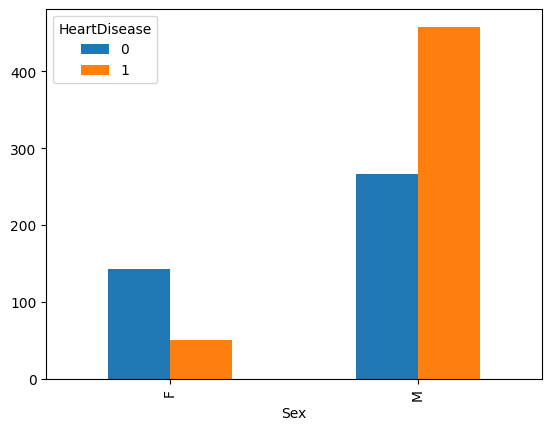

In [46]:
pd.crosstab(df.Sex, df.HeartDisease).plot(kind='bar') # Impact of Sex on Heart Disease

<Axes: xlabel='ChestPainType'>

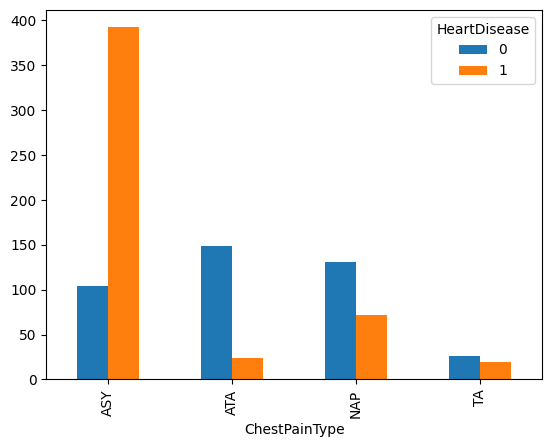

In [47]:
pd.crosstab(df.ChestPainType, df.HeartDisease).plot(kind='bar') # Impact of Type of Chest Pain on Heart Disease

<Axes: xlabel='RestingECG'>

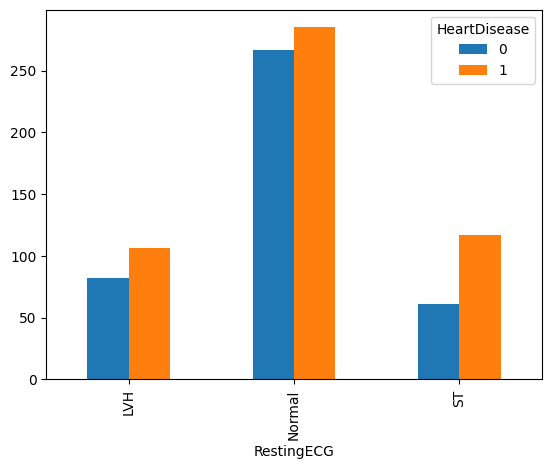

In [48]:
pd.crosstab(df.RestingECG, df.HeartDisease).plot(kind='bar') # Impact of Resting ECG on Heart Disease

<Axes: xlabel='ExerciseAngina'>

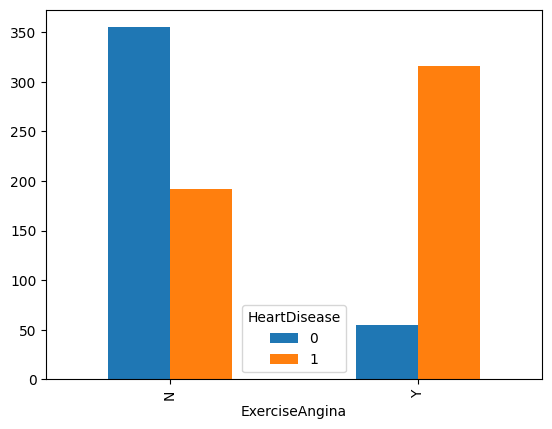

In [49]:
pd.crosstab(df.ExerciseAngina, df.HeartDisease).plot(kind='bar') # Impact of Exercise Angina on Heart Disease

<Axes: xlabel='ST_Slope'>

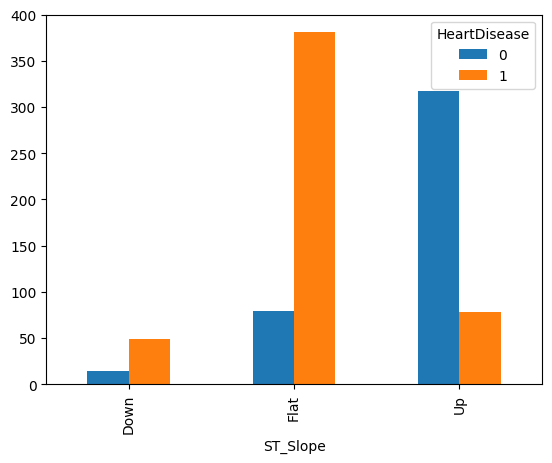

In [50]:
pd.crosstab(df.ST_Slope, df.HeartDisease).plot(kind='bar') # Impact of ST_Slope on Heart Disease

### Treat Outliers

In [65]:
df[df.Cholesterol > (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
76    32   M           ASY        118          529          0     Normal   
149   54   M           ASY        130          603          1     Normal   
616   67   F           NAP        115          564          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
76     130              N      0.0     Flat             1  
149    125              Y      1.0     Flat             1  
616    160              N      1.6     Flat             0

In [66]:
df.shape

(918, 12)

In [67]:
df = df[df.Cholesterol <= (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]
df.shape

(915, 12)

In [68]:
df[df.MaxHR > (df.MaxHR.mean() + 3 * df.MaxHR.std())]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

In [69]:
df[df.FastingBS > (df.FastingBS.mean() + 3 * df.FastingBS.std())]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

In [70]:
df[df.Oldpeak > (df.Oldpeak.mean() + 3 * df.Oldpeak.std())]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
166   50   M           ASY        140          231          0         ST   
702   59   M            TA        178          270          0        LVH   
771   55   M           ASY        140          217          0     Normal   
791   51   M           ASY        140          298          0     Normal   
850   62   F           ASY        160          164          0        LVH   
900   58   M           ASY        114          318          0         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
166    140              Y      5.0     Flat             1  
702    145              N      4.2     Down             0  
771    111              Y      5.6     Down             1  
791    122              Y      4.2     Flat             1  
850    145              N      6.2     Down             1  
900    140              N      4.4     Down             1

In [71]:
df = df[df.Oldpeak <= (df.Oldpeak.mean() + 3 * df.Oldpeak.std())]
df.shape

(909, 12)

In [72]:
df[df.RestingBP > (df.RestingBP.mean() + 3 * df.RestingBP.std())]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190          241          0     Normal   
241   54   M           ASY        200          198          0     Normal   
365   64   F           ASY        200            0          0     Normal   
399   61   M           NAP        200            0          1         ST   
592   61   M           ASY        190          287          1        LVH   
732   56   F           ASY        200          288          1        LVH   
759   54   M           ATA        192          283          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
109    106              N      0.0       Up             0  
241    142              Y      2.0     Flat             1  
365    140              Y      1.0     Flat             1  
399     70              N      0.0     Flat             1  
592    150              Y      2.0     Down             1  
732    133              Y      4.0     Down             1  
759    195              N      0.0       Up             1

In [73]:
df = df[df.RestingBP <= (df.RestingBP.mean() + 3 * df.RestingBP.std())]
df.shape

(902, 12)

### Encoding

In [74]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[902 rows x 12 columns]

In [75]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [76]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [77]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [78]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

1. **Sex**: Binary categorical feature, *label encoding* is fine (M = 0, F = 1)
2. **ChestPainType**: Categorical feature with no ordinal relationship. Use *one-hot encoding* (categories: ATA, NAP, ASY, TA)
3. **RestingECG**: Categorical feature with no ordinal relationship. Use *one-hot encoding* (categories: Normal, ST, LVH)
4. **ExerciseAngina**: Binary categorical feature, *label encoding* is fine (N = 0, Y = 1)
5. **ST_Slope**: Categorical feature with potential ordinal relationship. *Ordinal encoding* is suitable (Up = 0, Flat = 1, Down = 2)

Label Encoding

In [79]:
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

df

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1           ATA        140          289          0     Normal   
1     49    0           NAP        160          180          0     Normal   
2     37    1           ATA        130          283          0         ST   
3     48    0           ASY        138          214          0     Normal   
4     54    1           NAP        150          195          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    1            TA        110          264          0     Normal   
914   68    1           ASY        144          193          1     Normal   
915   57    1           ASY        130          131          0     Normal   
916   57    0           ATA        130          236          0        LVH   
917   38    1           NAP        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172               0      0.0       Up             0  
1      156               0      1.0     Flat             1  
2       98               0      0.0       Up             0  
3      108               1      1.5     Flat             1  
4      122               0      0.0       Up             0  
..     ...             ...      ...      ...           ...  
913    132               0      1.2     Flat             1  
914    141               0      3.4     Flat             1  
915    115               1      1.2     Flat             1  
916    174               0      0.0     Flat             1  
917    173               0      0.0       Up             0  

[902 rows x 12 columns]

Ordinal Encoding

In [80]:
oe = OrdinalEncoder(categories = [["Up", "Flat", "Down"]], dtype=int)

df["ST_Slope"] = oe.fit_transform(df[["ST_Slope"]])
df

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1           ATA        140          289          0     Normal   
1     49    0           NAP        160          180          0     Normal   
2     37    1           ATA        130          283          0         ST   
3     48    0           ASY        138          214          0     Normal   
4     54    1           NAP        150          195          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    1            TA        110          264          0     Normal   
914   68    1           ASY        144          193          1     Normal   
915   57    1           ASY        130          131          0     Normal   
916   57    0           ATA        130          236          0        LVH   
917   38    1           NAP        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         0             0  
1      156               0      1.0         1             1  
2       98               0      0.0         0             0  
3      108               1      1.5         1             1  
4      122               0      0.0         0             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         0             0  

[902 rows x 12 columns]

One-Hot Encoding

In [81]:
df_ohe = df[['ChestPainType', 'RestingECG']]
df_ohe

ChestPainType RestingECG
0             ATA     Normal
1             NAP     Normal
2             ATA         ST
3             ASY     Normal
4             NAP     Normal
..            ...        ...
913            TA     Normal
914           ASY     Normal
915           ASY     Normal
916           ATA        LVH
917           NAP     Normal

[902 rows x 2 columns]

In [82]:
df_ohe = pd.get_dummies(df_ohe, drop_first=True)
df_ohe = df_ohe.astype(float)
df_ohe

ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  1.0                0.0               0.0   
1                  0.0                1.0               0.0   
2                  1.0                0.0               0.0   
3                  0.0                0.0               0.0   
4                  0.0                1.0               0.0   
..                 ...                ...               ...   
913                0.0                0.0               1.0   
914                0.0                0.0               0.0   
915                0.0                0.0               0.0   
916                1.0                0.0               0.0   
917                0.0                1.0               0.0   

     RestingECG_Normal  RestingECG_ST  
0                  1.0            0.0  
1                  1.0            0.0  
2                  0.0            1.0  
3                  1.0            0.0  
4                  1.0            0.0  
..                 ...            ...  
913                1.0            0.0  
914                1.0            0.0  
915                1.0            0.0  
916                0.0            0.0  
917                1.0            0.0  

[902 rows x 5 columns]

In [83]:
df = pd.concat([df, df_ohe], axis=1)
df.drop(columns=['ChestPainType', 'RestingECG'], inplace=True)
df

Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0     40    1        140          289          0    172               0   
1     49    0        160          180          0    156               0   
2     37    1        130          283          0     98               0   
3     48    0        138          214          0    108               1   
4     54    1        150          195          0    122               0   
..   ...  ...        ...          ...        ...    ...             ...   
913   45    1        110          264          0    132               0   
914   68    1        144          193          1    141               0   
915   57    1        130          131          0    115               1   
916   57    0        130          236          0    174               0   
917   38    1        138          175          0    173               0   

     Oldpeak  ST_Slope  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0        0.0         0             0                1.0                0.0   
1        1.0         1             1                0.0                1.0   
2        0.0         0             0                1.0                0.0   
3        1.5         1             1                0.0                0.0   
4        0.0         0             0                0.0                1.0   
..       ...       ...           ...                ...                ...   
913      1.2         1             1                0.0                0.0   
914      3.4         1             1                0.0                0.0   
915      1.2         1             1                0.0                0.0   
916      0.0         1             1                1.0                0.0   
917      0.0         0             0                0.0                1.0   

     ChestPainType_TA  RestingECG_Normal  RestingECG_ST  
0                 0.0                1.0            0.0  
1                 0.0                1.0            0.0  
2                 0.0                0.0            1.0  
3                 0.0                1.0            0.0  
4                 0.0                1.0            0.0  
..                ...                ...            ...  
913               1.0                1.0            0.0  
914               0.0                1.0            0.0  
915               0.0                1.0            0.0  
916               0.0                0.0            0.0  
917               0.0                1.0            0.0  

[902 rows x 15 columns]

### Scaling

In [84]:
df.select_dtypes(include=[np.number]).groupby('HeartDisease').mean()

Age       Sex   RestingBP  Cholesterol  FastingBS  \
HeartDisease                                                            
0             50.518428  0.651106  129.953317   226.154791   0.108108   
1             55.929293  0.905051  133.418182   173.660606   0.335354   

                   MaxHR  ExerciseAngina   Oldpeak  ST_Slope  \
HeartDisease                                                   
0             148.233415        0.135135  0.396806  0.255528   
1             127.486869        0.622222  1.236162  0.933333   

              ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
HeartDisease                                                           
0                      0.363636           0.319410          0.061425   
1                      0.046465           0.143434          0.040404   

              RestingECG_Normal  RestingECG_ST  
HeartDisease                                    
0                      0.653563       0.149877  
1                      0.563636       0.230303

In [85]:
X = df.drop(columns='HeartDisease')
y = df.HeartDisease

In [86]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-1.42896269,  0.51485643,  0.46089071, ..., -0.22914788,
         0.80934904, -0.49062742],
       [-0.47545956, -1.94228905,  1.5925728 , ..., -0.22914788,
         0.80934904, -0.49062742],
       [-1.74679706,  0.51485643, -0.10495034, ..., -0.22914788,
        -1.23556086,  2.03820649],
       ...,
       [ 0.37209878,  0.51485643, -0.10495034, ..., -0.22914788,
         0.80934904, -0.49062742],
       [ 0.37209878, -1.94228905, -0.10495034, ..., -0.22914788,
        -1.23556086, -0.49062742],
       [-1.64085227,  0.51485643,  0.3477225 , ..., -0.22914788,
         0.80934904, -0.49062742]])

## Model

In [87]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [1, 10, 20, 50, 80],
            'kernel': ['rbf', 'linear'],
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [20, 60, 80, 100],
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(max_iter=10000),
        'params': {
            'C': [1, 5, 10, 20],
        }
    },
}

In [95]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_results = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_results

model  best_score                    best_params
0                  svm    0.819227  {'C': 20, 'kernel': 'linear'}
1        random_forest    0.831443           {'n_estimators': 60}
2  logistic_regression    0.802609                       {'C': 1}

#### PCA

In [96]:
X.shape

(902, 14)

In [97]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)
X_pca

array([[ 9.38251923e+01,  2.94014488e+01,  1.15877038e+01, ...,
         1.64737143e-01,  3.10104887e-01,  3.18462849e-01],
       [-1.55837108e+01,  1.41096144e+01,  3.16815520e+01, ...,
        -6.56110278e-01, -1.24457977e-01,  9.71053180e-02],
       [ 8.32954682e+01, -3.86890549e+01, -1.53981063e+01, ...,
         1.10555839e-01,  4.13737103e-01,  4.23969005e-01],
       ...,
       [-6.75726847e+01, -1.76123026e+01, -4.35160521e+00, ...,
        -2.16268714e-01, -9.63229046e-03, -6.26691595e-02],
       [ 4.07036353e+01,  3.33874908e+01,  5.98942279e+00, ...,
        -8.45769683e-01,  3.25063172e-02,  1.90414802e-01],
       [-1.99131679e+01,  3.72914209e+01,  1.33147073e+01, ...,
         1.53012546e-01,  1.65155044e-01,  8.66923089e-02]])

In [98]:
X_pca.shape

(902, 12)

In [99]:
pca.explained_variance_ratio_

array([9.20125404e-01, 5.06611722e-02, 2.35756779e-02, 5.44037403e-03,
       8.50979014e-05, 2.44521025e-05, 1.96919351e-05, 1.59974097e-05,
       1.32707186e-05, 1.26052188e-05, 1.05505796e-05, 7.40886966e-06])

In [100]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [103]:
model_pca = RandomForestClassifier(n_estimators=60)
model_pca.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=60)

In [104]:
model_pca.score(X_test_pca, y_test)

0.850828729281768